In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
df = pd.read_csv('adult.data',header = None, names = col_names)

In [21]:
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()
print(df.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [22]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [23]:
feature_col = ['age','capital-gain', 'capital-loss', 'hours-per-week', 'sex','race', 'hours-per-week', 'education']
X = pd.get_dummies(data=df[feature_col],drop_first=True)

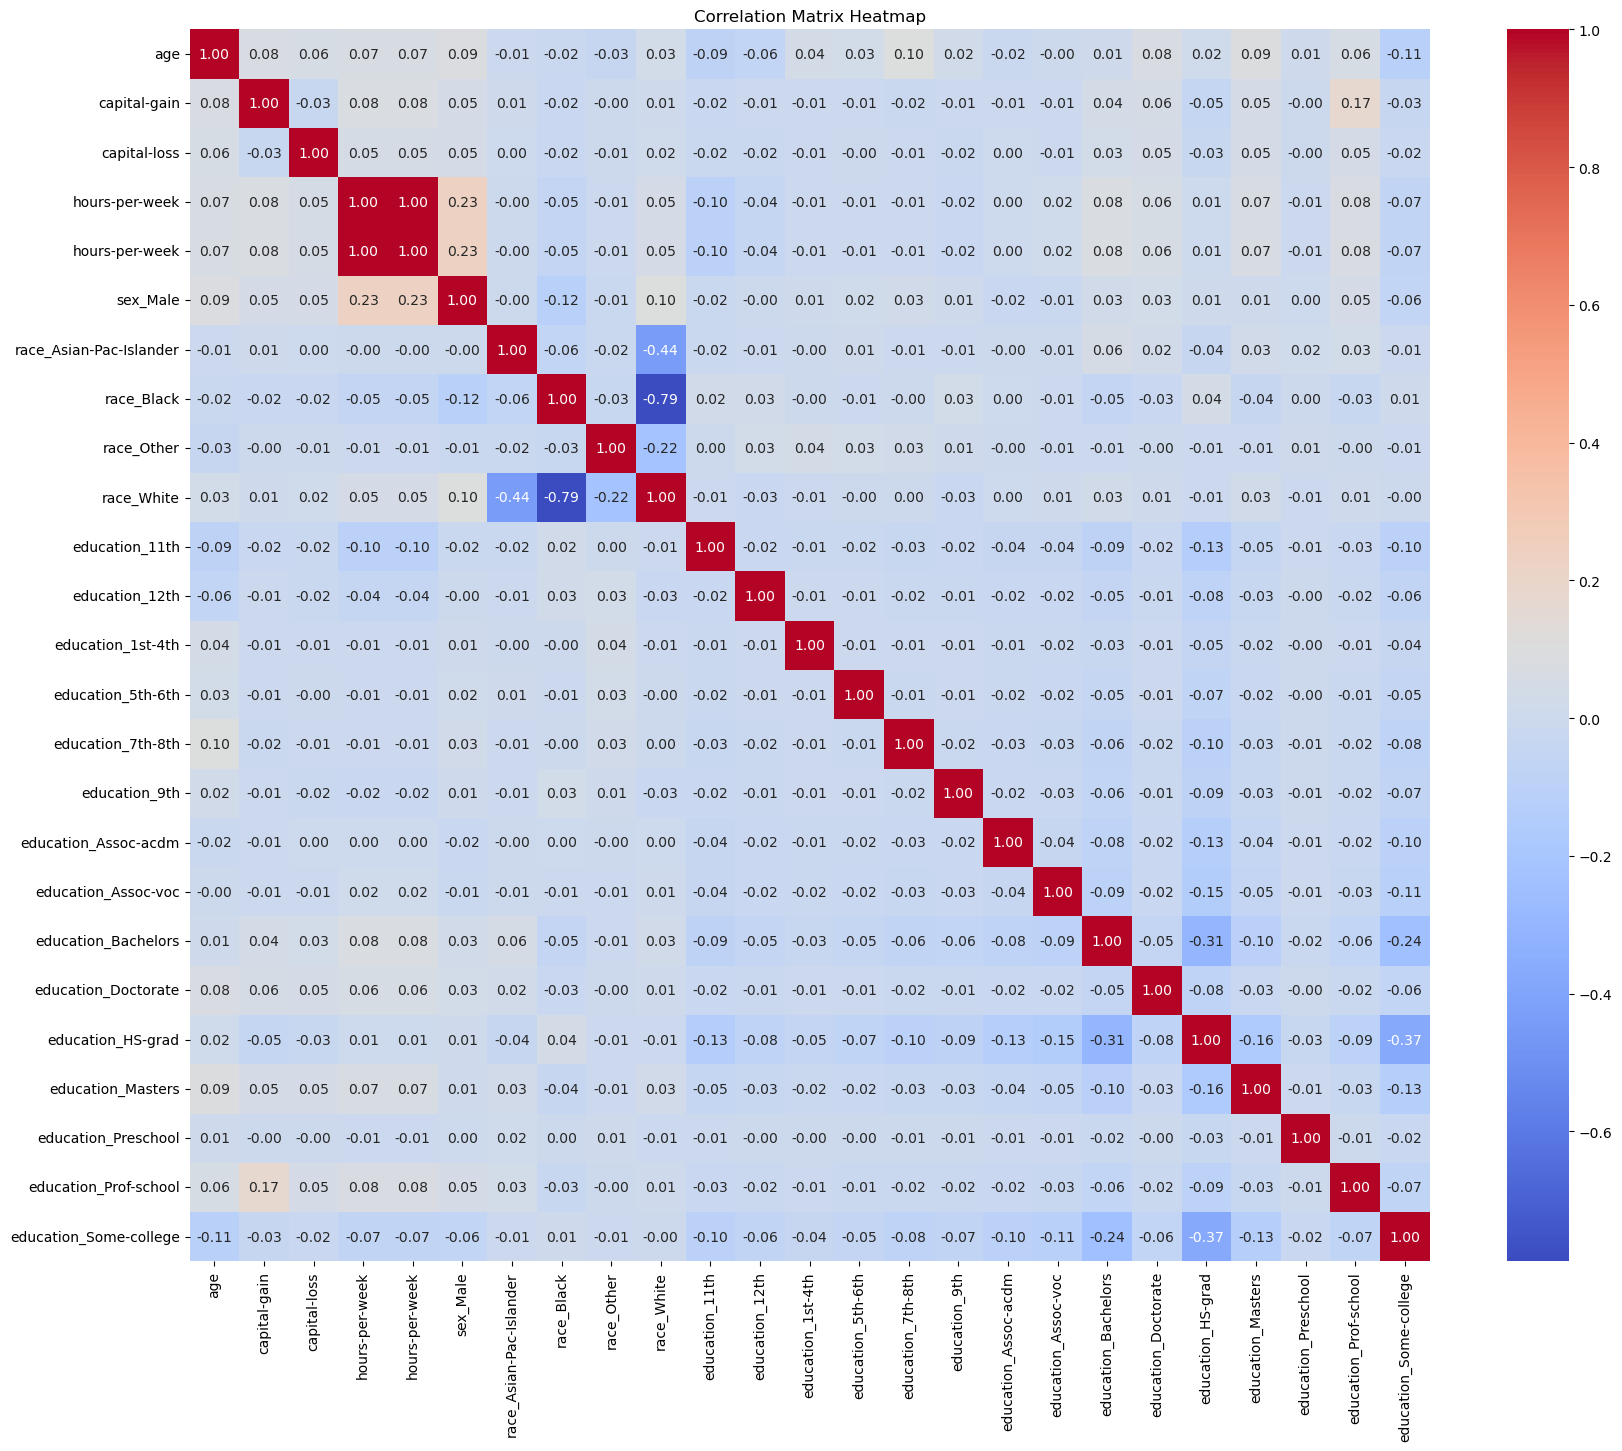

In [24]:
correlation_matrix = X.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()
plt.close()

In [25]:
y = df["income"].replace({"<=50K": 0, ">50K": 1})

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [26]:
log_reg = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
log_reg.fit(x_train,y_train)
y_pred = log_reg.predict(x_test)

In [27]:
print('Model Parameters, Intercept:',log_reg.intercept_)

print('Model Parameters, Coeff:',log_reg.coef_)

Model Parameters, Intercept: [-5.66013501]
Model Parameters, Coeff: [[ 3.70701742e-02  3.15075979e-04  6.66879482e-04  1.88905151e-02
   1.36002665e-02  1.03500049e+00  0.00000000e+00 -3.18330207e-01
   0.00000000e+00  1.16467365e-01 -5.70363293e-01  0.00000000e+00
   0.00000000e+00 -3.97231398e-01 -8.96664849e-01 -4.99890527e-01
   5.77690962e-01  5.52133723e-01  1.28886801e+00  1.80209052e+00
   0.00000000e+00  1.60409774e+00  0.00000000e+00  1.82797718e+00
   3.90135801e-01]]


In [28]:
conf_matrix = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print('Confusion Matrix on test set:',conf_matrix)
print('Accuracy Score on test set:',accuracy)
print('Recall Score on test set:',recall)

Confusion Matrix on test set: [[4772  254]
 [ 880  607]]
Accuracy Score on test set: 0.8258866881621373
Recall Score on test set: 0.4082044384667115


In [29]:
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
coeff_df = coeff_df[coeff_df['Coefficient'] != 0]
coeff_df = coeff_df.reindex(coeff_df['Coefficient'].abs().sort_values(ascending=False).index)
coeff_df = coeff_df.reset_index(drop=True)
print(coeff_df)

                   Feature  Coefficient
0    education_Prof-school     1.827977
1      education_Doctorate     1.802091
2        education_Masters     1.604098
3      education_Bachelors     1.288868
4                 sex_Male     1.035000
5        education_7th-8th    -0.896665
6     education_Assoc-acdm     0.577691
7           education_11th    -0.570363
8      education_Assoc-voc     0.552134
9            education_9th    -0.499891
10       education_5th-6th    -0.397231
11  education_Some-college     0.390136
12              race_Black    -0.318330
13              race_White     0.116467
14                     age     0.037070
15          hours-per-week     0.018891
16          hours-per-week     0.013600
17            capital-loss     0.000667
18            capital-gain     0.000315


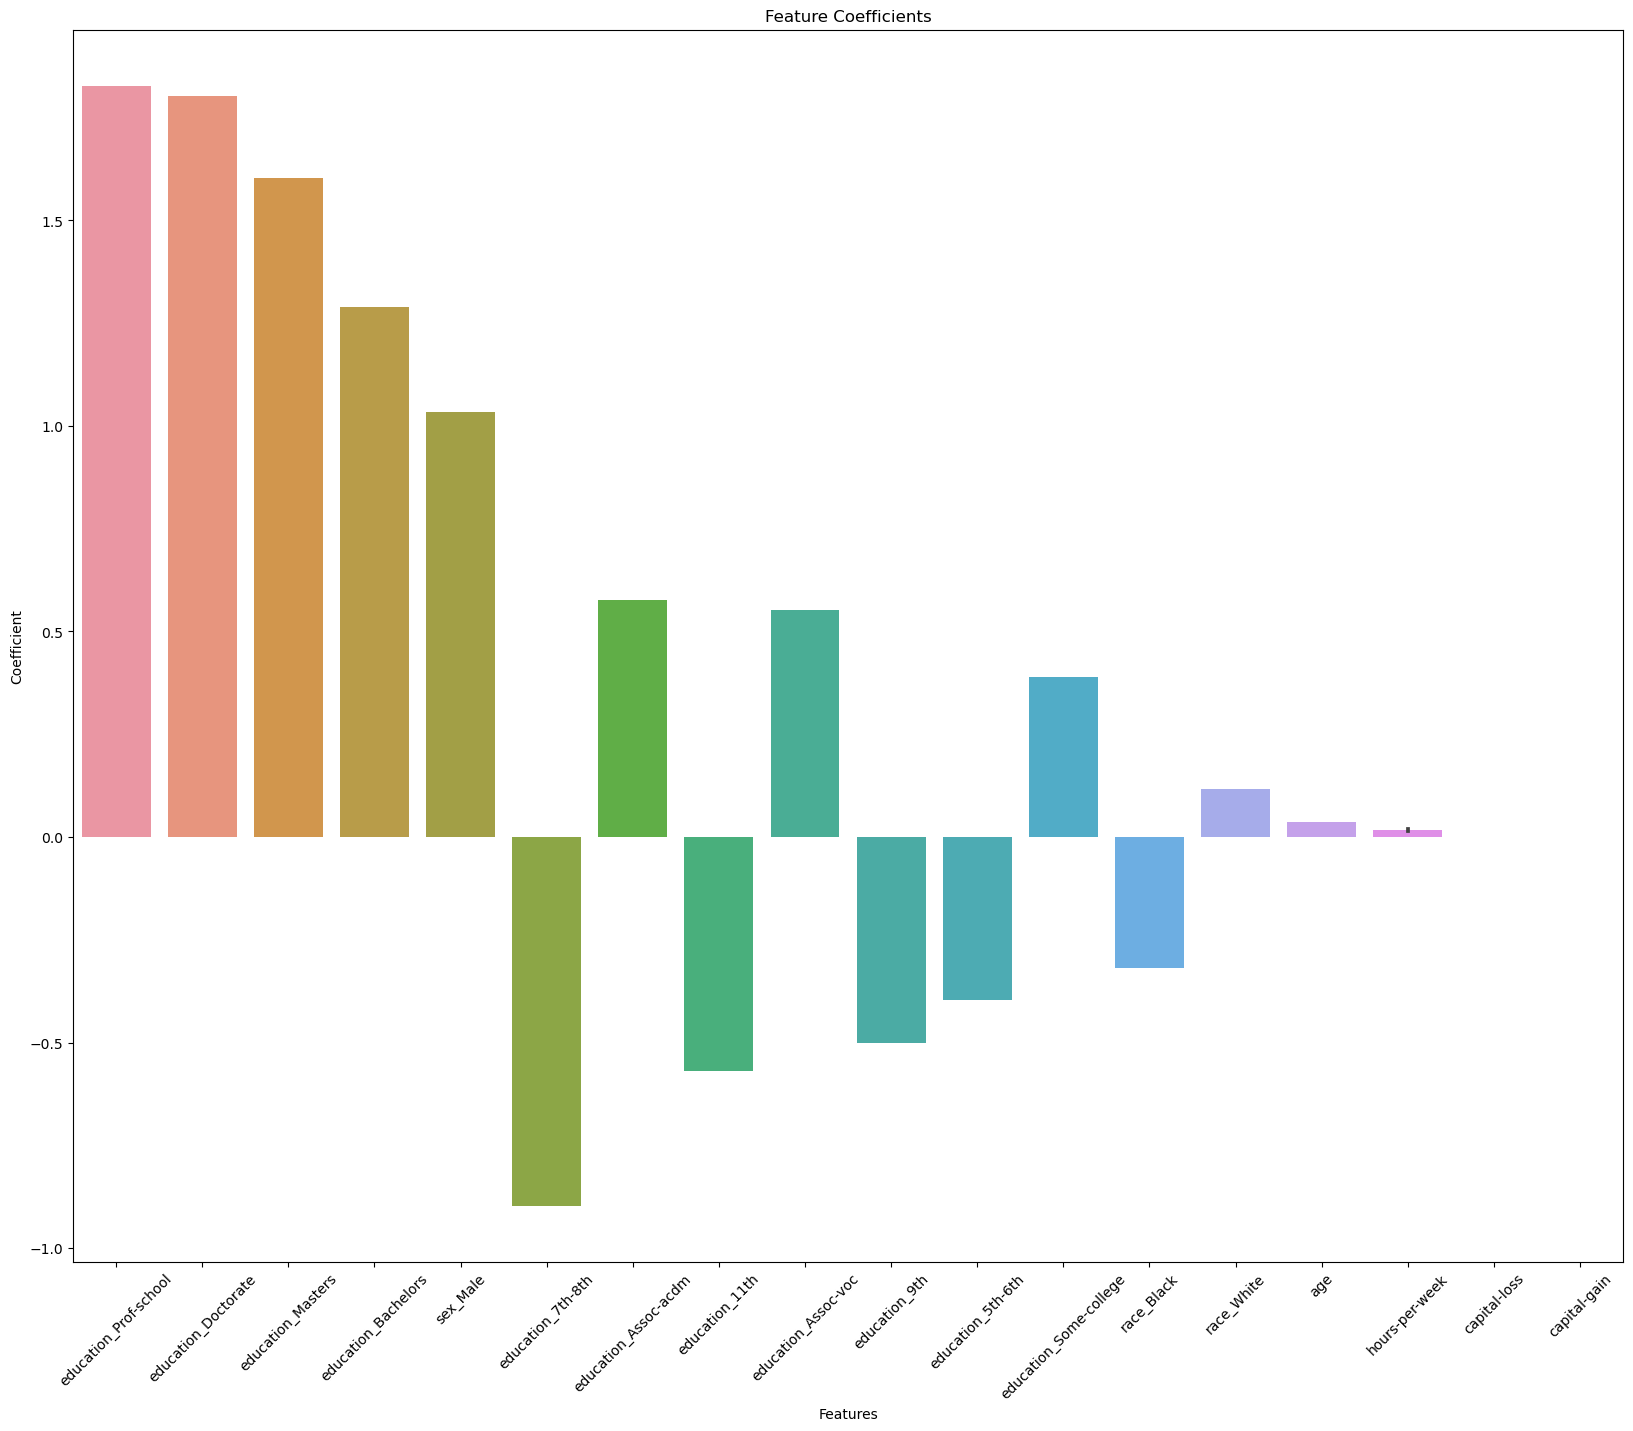

In [32]:
plt.figure(figsize=(20,16))
sns.barplot(data=coeff_df,x="Feature",y="Coefficient")
plt.xticks(rotation=45)  
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Coefficients')
plt.show()
plt.close()

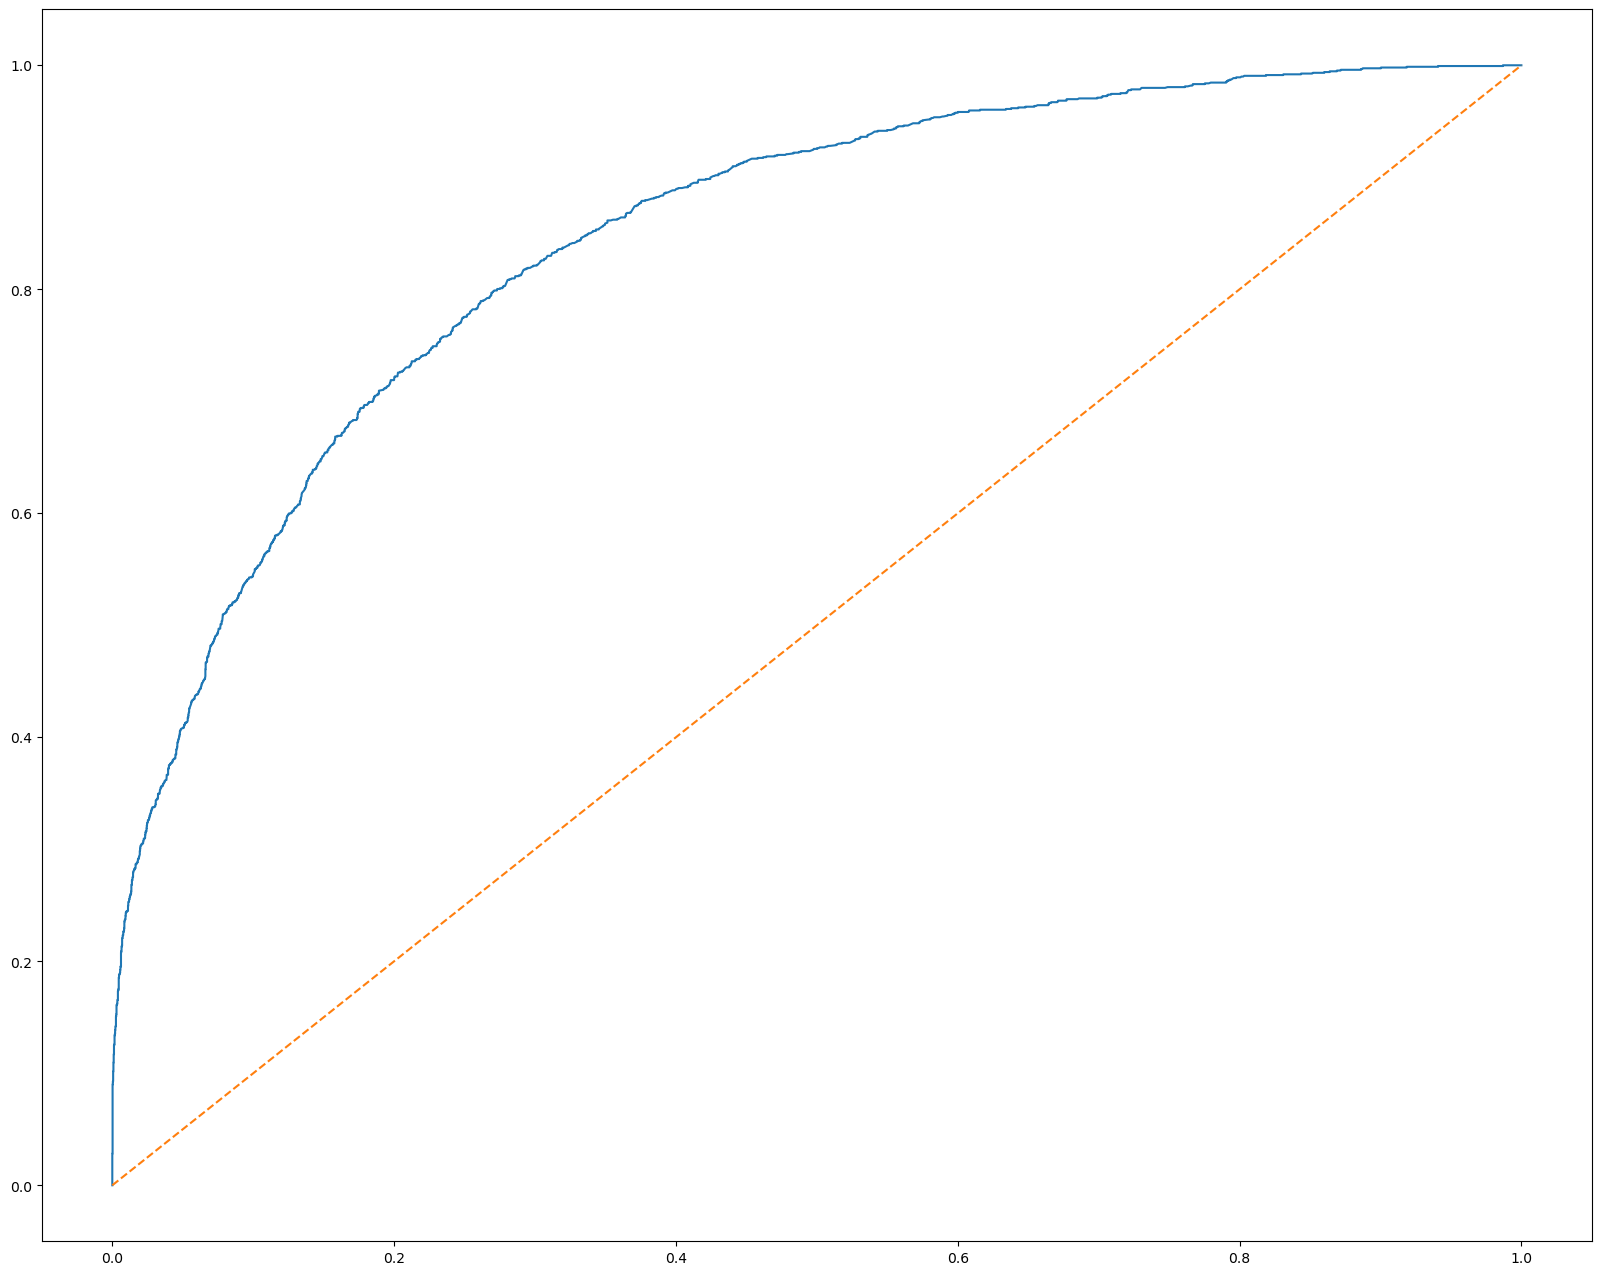

0.845759548665701


In [33]:
y_pred_prob = log_reg.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plt.figure(figsize=(20, 16))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle="--")
plt.show()
print(roc_auc)